# Day 2: Image functions

In [2]:
# importing needed libraries globally
from PIL import Image # for reading images
import numpy as np # for arrays manipulations
import matplotlib.pyplot as plt # for 2D plottings

## Image as a function

In [3]:
# some needed imports
from cycler import cycler # for cycling rgb
default_cycler = (cycler(color=['r', 'g', 'b', 'y']))
plt.rc('axes', prop_cycle=default_cycler)

In [260]:
# defining functions
def draw_h_line(imarray,p):
    """
    Receive 3 channel image and draw horizontal line at @p 
    """
    from skimage.draw import line_aa
    if len(imarray.shape) > 2:
        h,w,_ = imarray.shape
        value = [0,0,0]
    else:
        h,w = imarray.shape
        value = [0]
    rr, cc, val = line_aa(p, 0, p, w-1)
    imarray[rr,cc] = value

def draw_v_line(imarray,p):
    """
    Receive 3 channel image and draw vertical line at @p 
    """
    from skimage.draw import line_aa
    h,w,_ = imarray.shape
    rr, cc, val = line_aa(0, p, h-1, p)
    imarray[rr,cc] = [0,0,0] 
    
def plot_row(imarray,index,ax=None):
    """
    Receive 1 channel of an image and plot row at @index 
    """
    y = imarray[index,:]
    x = np.arange(len(y))
    if ax is None:
        plt.plot(x,y)
    else:
        ax.plot(x,y)
# defining functions
def plot_col(imarray,index,ax):
    """
    Receive 1 channel of an image and plot col at @index 
    """
    y = imarray[:,index]
    x = np.arange(len(y))
    if ax is None:
        plt.plot(x,y)
    else:
        ax.plot(x,y)

def plot_3d(imarray):
    """
    Receivean 1 channel image and plot it as function in 3d
    """
    w,h = imarray.shape
    fig = plt.figure(figsize=(8, 3))
    ax1 = fig.add_subplot(111, projection='3d')
    _x = np.arange(w)
    _y = np.arange(h)
    for x in _x:
        ax1.plot([x]*h,_y,imarray[x,:])
def red(im):
    """
    Receive multi channels of an image and return the red channel
    """
    return im[:,:,0]
def green(im):
    """
    Receive multi channels of an image and return the green channel
    """
    return im[:,:,1]
def blue(im):
    """
    Receive multi channels of an image and return the blue channel
    """
    return im[:,:,2]

def imread(imgfile,numpy=False):
    """
    read an image as numpy array and make it mutatable
    """
    img = Image.open(imgfile)
    if numpy:
        img = np.asarray(img)
        return img.copy()
    else:
        return img
def plot_grid(imarrays,titles,figsize=(10,10)):
    """
    show four images
    """
    count = 1
    plt.figure(figsize=figsize)
    for im,t in zip(imarrays,titles):
        plt.subplot(220+count)
        ax = plt.gca()
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator()) 
        count += 1
        if len(im.shape) < 3:
            plt.imshow(im,cmap="gray")
        else:
            plt.imshow(im)
        plt.title(t, size=20)
    fig.set_tight_layout(True)
    plt.show()

def plot_row_with_image(img,rownum,ax1,ax2):
    img_copy = img.copy()
    if len(img_copy.shape) > 2:
        h,w,_ = img_copy.shape
        ax1.imshow(img_copy)
    else:
        h,w = img_copy.shape
        ax1.imshow(img_copy,cmap="gray")
    draw_h_line(img_copy,rownum)
    plot_row(img, rownum,ax2)
    
def normalize_img(s):
    """
    Receive image in any data types and range and normalize it
    to [0,255]
    """
    start = 0
    end = 255
    width = end - start
    res = (s - s.min())/(s.max() - s.min()) * width + start
    return res

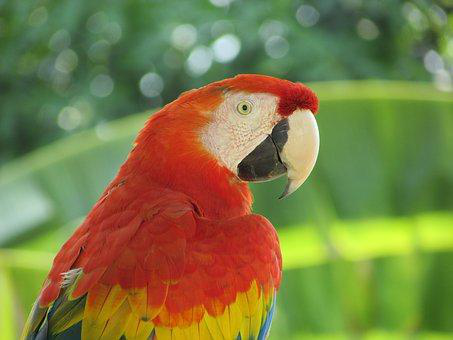

In [23]:
# Openning parrot image 
parrot = imread("imgs/parrot.png")
parrot

In [6]:
# convert the image to ND array
p_arr = np.asarray(parrot)
p_arr.shape

(340, 453, 3)

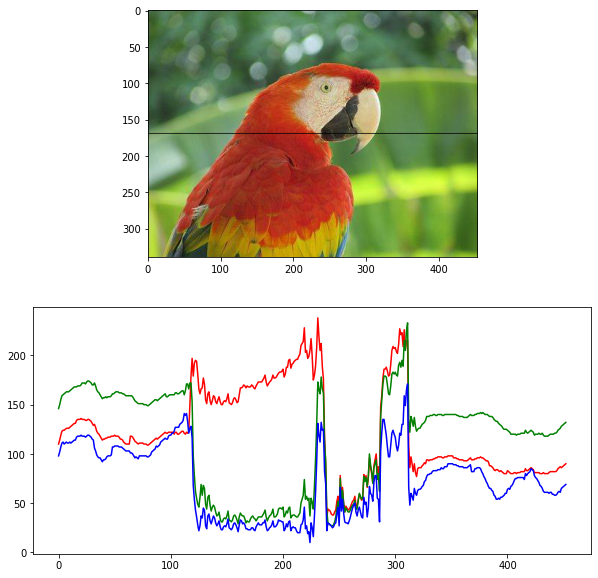

In [7]:
# plotting center row
%matplotlib inline
p_arr_copy = p_arr.copy()
height,width,channels = p_arr.shape
fig, ax = plt.subplots(nrows=2)
fig.set_size_inches((10,10))
draw_h_line(p_arr_copy,height//2)
ax[0].imshow(p_arr_copy)
plot_row(p_arr, height//2,ax[1])

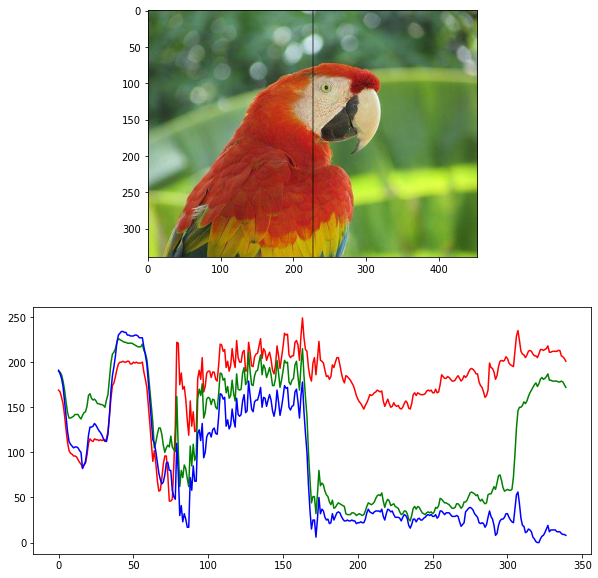

In [8]:
# plotting center col
p_arr_copy = p_arr.copy()
height,width,channels = p_arr.shape
fig, ax = plt.subplots(nrows=2)
fig.set_size_inches((10,10))
draw_v_line(p_arr_copy,width//2)
ax[0].imshow(p_arr_copy)
plot_col(p_arr, width//2,ax[1])

In [9]:
# plotting all rows in 3D
# %matplotlib notebook
# plot_3d(red(p_arr))

When we deal with images as functions, we can make use of all functions powerful tools (e.g. interpolation, convolvement, filters, and transformations). Lets

### Restoration

In [73]:
def add_salt_and_pepper(gb, prob):
    '''Adds "Salt & Pepper" noise to an image.
    gb: should be one-channel image with pixels in [0, 1] range
    prob: probability (threshold) that controls level of noise'''

    rnd = np.random.rand(gb.shape[0], gb.shape[1])
    noisy = gb.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 1
    return np.uint8(noisy)

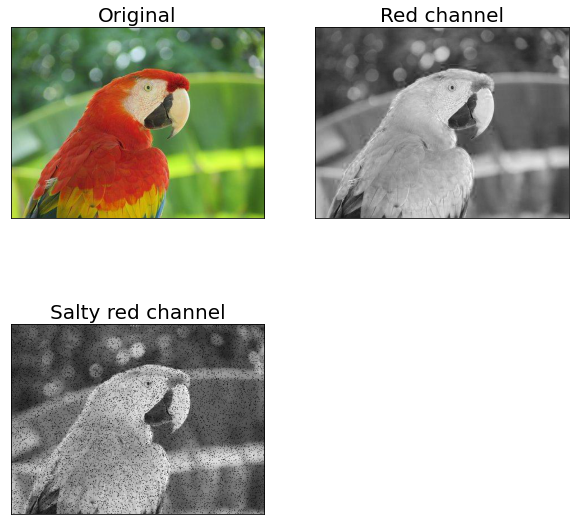

In [104]:
# adding salt and pepper noise to our image
parrot = imread("imgs/parrot.png",True)
red_parrot = red(parrot)
salty_parrot = add_salt_and_pepper(red_parrot,0.04)
plot_grid([parrot,red_parrot,salty_parrot],
         ["Original","Red channel","Salty red channel"])

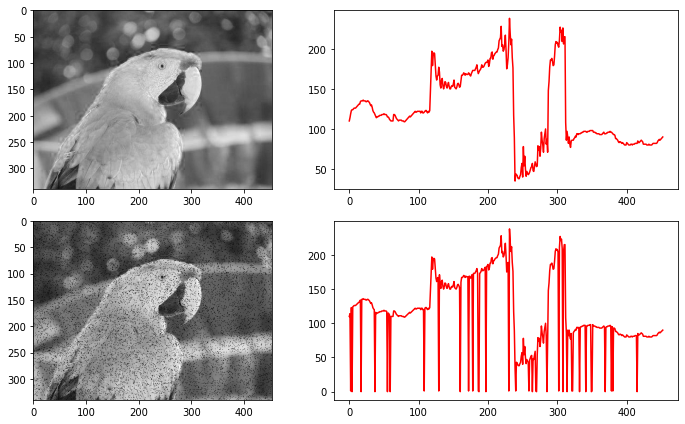

In [105]:
# plotting center row
h,_ = red_parrot.shape
fig, ax = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches((10,6))
fig.set_tight_layout(True)
plot_row_with_image(red_parrot,h//2,ax[0,0],ax[0,1])
plot_row_with_image(salty_parrot,h//2,ax[1,0],ax[1,1])

**Moving average**

In [106]:
def moving_average(a, n=3) :
    """
    Calculate a moving average for a series
    """
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

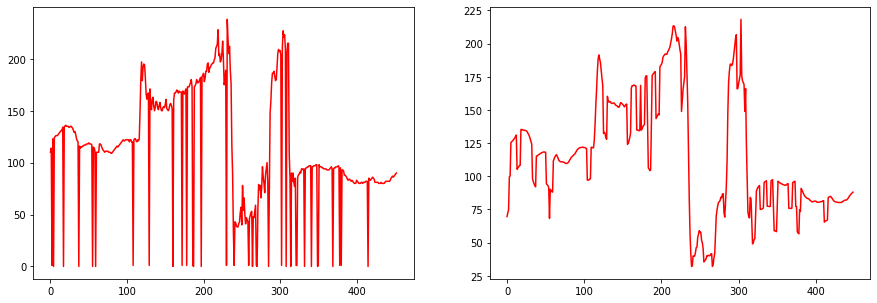

In [107]:
h,_ = red_parrot.shape
mrow = salty_parrot[h//2]
cleaned = moving_average(mrow,5)
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].plot(mrow)
ax[1].plot(cleaned)

**Weighted moving average**

In [108]:
def weighted_moving_average(a,weights=np.array([1,4,6,4,1])):
    """
    Calculate the weighted moving average for a series
    """
    s = sum(weights)
    n = len(weights)
    h = n//2
    ret = [np.dot(a[i-h:i+h+1],weights)//s for i in range(h,len(a)-h)]
    return ret

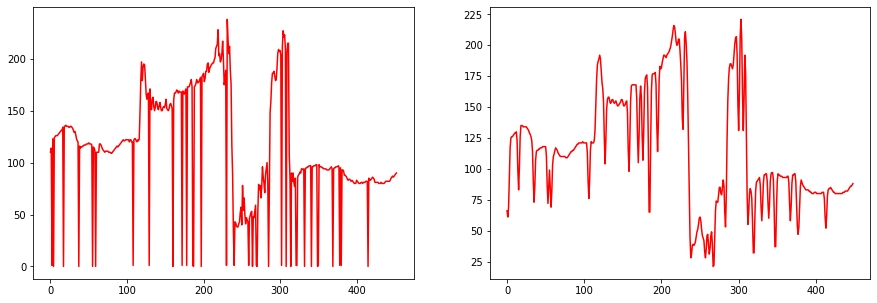

In [109]:
h,_ = red_parrot.shape
mrow = salty_parrot[h//2]
cleaned = weighted_moving_average(mrow)
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
ax[0].plot(mrow)
ax[1].plot(cleaned)

**Moving average in 2D**

In [110]:
def moving_average_2d(a, n=3) :
    """
    Calculate the moving average for an image
    """
    w,h = a.shape
    m = n*n
    half = n//2
    x = np.copy(a)
    for i in range(half,w-half):
        for j in range(half,h-half):
            s = round(sum(a[i-half:i+half+1,j-half:j+half+1].flatten()))
            x[i,j] = s/float(m)
    return x

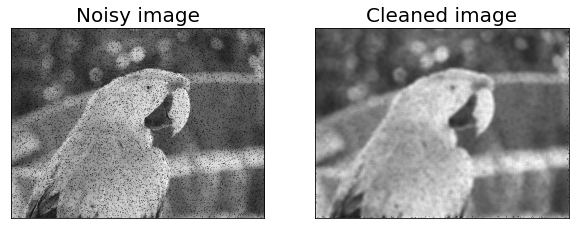

In [111]:
cleaned = moving_average_2d(salty_parrot,n=7)
plot_grid([salty_parrot,cleaned],["Noisy image","Cleaned image"])

**Now using scipy**

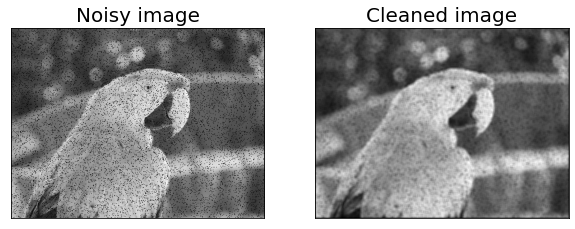

In [112]:
## Using uniform filter
from scipy.ndimage import uniform_filter
cleaned = uniform_filter(salty_parrot, size=5, mode='constant')
plot_grid([salty_parrot,cleaned],["Noisy image","Cleaned image"])

HMMMMMMMM!!

That doesn't seems to be good cleaning. How about other filters?!!

scipy comes with plenty of great denoising filters. The idea here is not to compare these filters but to show the underlying concept behind them. The secret word is <font color="red">IMAGE AS A FUNCTION</font>

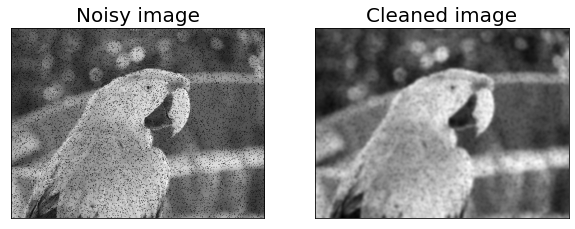

In [114]:
## Using gaussian filter
from scipy.ndimage import gaussian_filter
cleaned = gaussian_filter(salty_parrot, sigma=2)
plot_grid([salty_parrot,cleaned],["Noisy image","Cleaned image"])

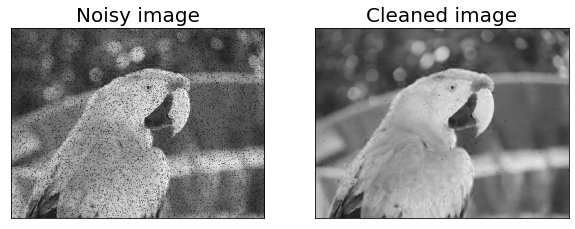

In [116]:
## THE MAGICAL Median filter
from scipy.ndimage import median_filter
cleaned = median_filter(salty_parrot, (3,3))
plot_grid([salty_parrot,cleaned],["Noisy image","Cleaned image"])

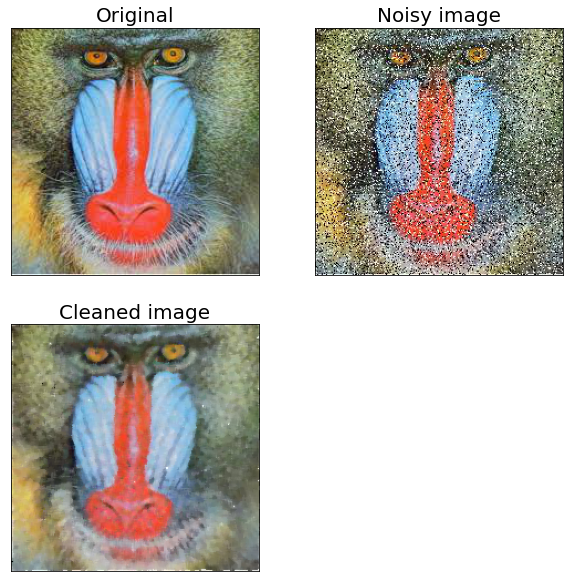

In [126]:
## Finally in color
mandrill = imread("imgs/mandrill.jpg",True)
noisy_mandrill = imread("imgs/mandrill_spnoise_0.3.jpg",True)
cleaned = median_filter(noisy_mandrill, (4,4,1))

plot_grid([mandrill,noisy_mandrill,cleaned],["Original","Noisy image","Cleaned image"])

### Resizing (make larger)

Similar to restoration, upscaling an image requires reconstruction of the image function. However, unless the original function is known, such reconstruction is hard due to many uncertainties. Thankfully, there are many good direct functions to resize an image with quite good quality. We will look at some of these.

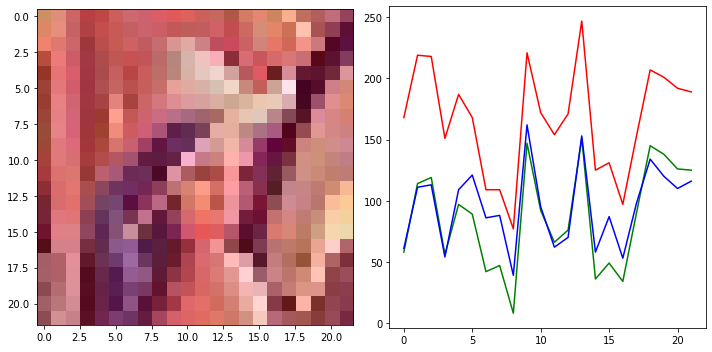

In [132]:
# plotting center row
lena_small = imread("imgs/lena_small.jpg",True)
h,w,_ = lena_small.shape
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches((10,5))
fig.set_tight_layout(True)
plot_row_with_image(lena_small,h//2,ax[0],ax[1])

In [167]:
# Showing the red row
red_row = lena_small[h//2,:,0]
plt.axis('off')
plt.imshow(red_row.reshape((-1,red_row.shape[0])),cmap="gray")

In [189]:
## Interpolating
x = np.arange(red_row.shape[0])
y = red_row
xi = np.linspace(0,red_row.shape[0],200)
yi = np.interp(xi, x, y)

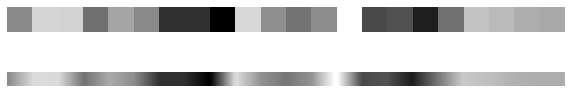

In [188]:
fig,ax = plt.subplots(nrows=2,figsize=(10,2))
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(red_row.reshape((-1,red_row.shape[0])),cmap="gray")
yi_p = np.tile(yi,5).reshape(5,yi.shape[0])
ax[1].imshow(yi_p,cmap="gray")

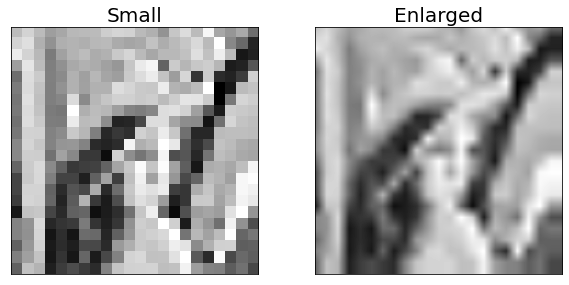

In [193]:
#dirty interpolating
def interpolate(y):
    x = np.arange(y.shape[0])
    xi = np.linspace(0,y.shape[0],200)
    return np.interp(xi, x, y)
# applying interpolation on the rows
large_red = np.apply_along_axis(interpolate, 1, red(lena_small))
# applying interpolation on the columns
large_red = np.apply_along_axis(interpolate, 0, large_red)
plot_grid([red(lena_small),large_red],["Small","Enlarged"])

**Other interpolation techniques**

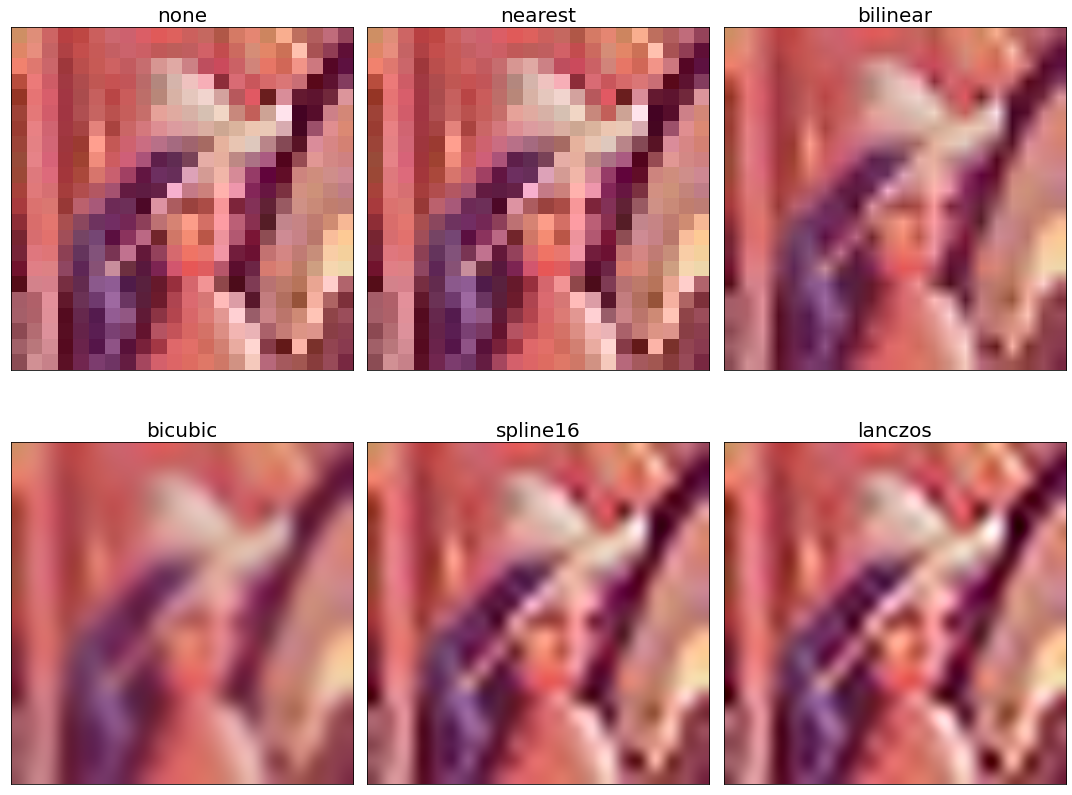

In [195]:
im = imread("imgs/lena_small.jpg",True)
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()

<font color="red">STAY TUNED, WE WILL SHOW HOW TO DO SUPER RESOLUTION WITH DEEP LEARNING</font>

## Frequency Domain

You can think of an image as a signal. A signal that comes in 2D. If that is the case, then according to Jean Baptiste Joseph Fourier's crazy idea, any periodic function (signal) can be rewritten as a weighted sum of sines and cosines of different frequencies. 

   
### A sum of sines

Our building block:

$ A*sin(\omega*x+\varphi)$

Add enough of them to get any signla f(x) you want

**Example**

<center>
<font size="2px">
            $A*\sum_{k=1}^{\infty}{\frac{1}{k}}sin(2*\pi*k*t) $
</font>
</center>

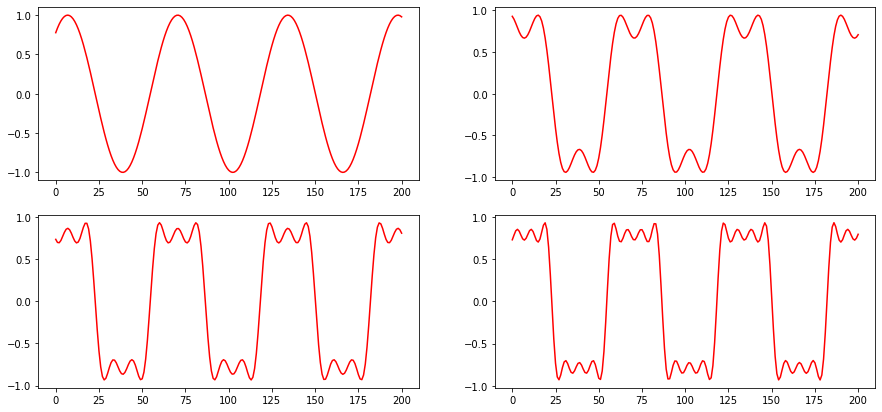

In [211]:
at = lambda t,k: + (1.0/k)*np.sin(2*np.pi*k*t)
Ampl = 1
x = np.linspace(np.pi, 2*np.pi, 201)
fig, ax = plt.subplots(2,2)
fig.set_size_inches(15,7)
pis = [(0,0),(0,1),(1,0),(1,1)]
for i in range(1,5):
    y = np.array([at(xi,1) for xi in x])
    for k in range(1,i):      
        y += Ampl*np.array([at(xi,2*k+1) for xi in x])
    ax[pis[i-1][0],pis[i-1][1]].plot(y)

Text(0.5, 0, 'frequency')

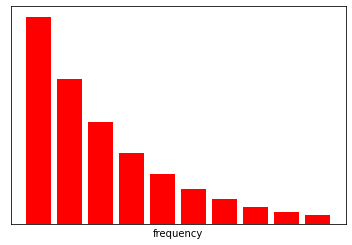

In [212]:
plt.bar(np.arange(10),[0.7**x for x in np.arange(10)])
ax = plt.gca()
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
ax.set_xlabel("frequency")

<a href="https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/">Better explained here</a>

### Fourier Transform

Represent the signal as an infinite weighted sum of an infinite number of sinusoids:



<img src="imgs/fig_2.png" />

### 2D Fourier Transforms

- The two dimensional version:.

$$F(u,v) = \int_{-\infty}^\infty \int_{-\infty}^\infty f(x,y)e^{-i2\pi ux  + vy} dx dy$$

- And the 2D Discrete FT:
$$F(k_x,k_y) = \frac{1}{N} \sum_{x=0}^{x=N-1}\sum_{y=0}^{y=N-1} f(x)e^\frac{-i2\pi(k_x x + k_y y)}{N} $$

- Works best when you put the origin of k in the middle

<img src="imgs/freq2d.jpg" />

In [267]:
# creating a sinusoid image
def sinusoid(A,f,phi,size):
    """
    Create a sinusoid image
    """
    t = np.arange(0,1,1/size)
    x = normalize_img(A*np.cos(2*np.pi*f*t + phi))
    s = np.array([x]*len(t)).astype(np.uint8)
    return s
def reverse_fft(fft_img):
    """
    From fft to spatial
    """
    im1_ = np.abs(fp.ifft2(fft_img))
    return im1_

def fft(spatial_img,log=True):
    """
    From spatial to fft
    """
    freq1 = fp.fft2(spatial_img)
    shifted = fp.fftshift(freq1)
    if log:
        shifted_d = 20*np.log10( 0.01 + np.abs(shifted))
    else:
        shifted_d = np.abs(shifted)
    angle = np.angle(shifted)
    return freq1,shifted,shifted_d,angle 

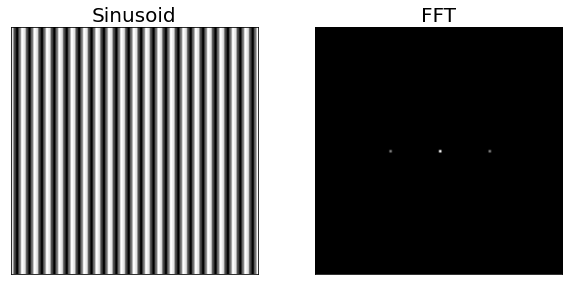

In [272]:
A = 1
f = 20
phi = np.pi/4
s_img = sinusoid(A,f,phi,100)
s_img_fft,_shifted,_dis,_ = fft(s_img,False)
plot_grid([s_img,_dis],["Sinusoid","FFT"])

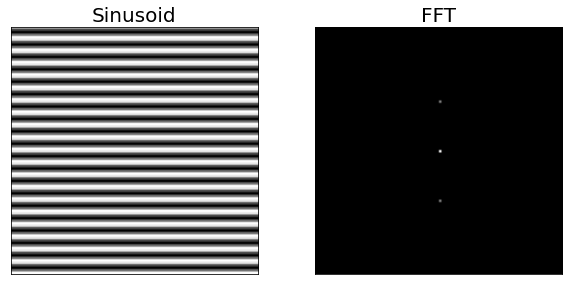

In [273]:
s_img_fft,_shifted,_dis,_ = fft(s_img.T,False)
plot_grid([s_img.T,_dis],["Sinusoid","FFT"])

### High pass filter and Low pass filter

In [274]:
import numpy.fft as fp

def createCircularMask(h, w, center, radius):
    """
    Create circular mask
    """
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask = dist_from_center <= radius
    return mask

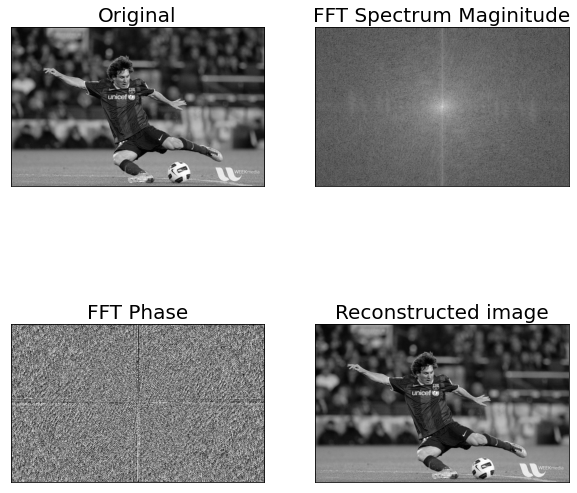

In [243]:
messi = imread("imgs/messi2.jpg",True)
messi_fft,_shifted,_log,a = fft(green(messi))
messi_rec = reverse_fft(messi_fft) 
plot_grid([green(messi),_log,a,messi_rec],
          ["Original","FFT Spectrum Maginitude",
           "FFT Phase","Reconstructed image"])

In [245]:
# circular mask
h,w,_ = messi.shape
center = [int(w/2), int(h/2)]
mask = createCircularMask(h, w, center=center,radius=40)

In [255]:
# fft 
messi_fft,_shifted,_log,a = fft(green(messi))

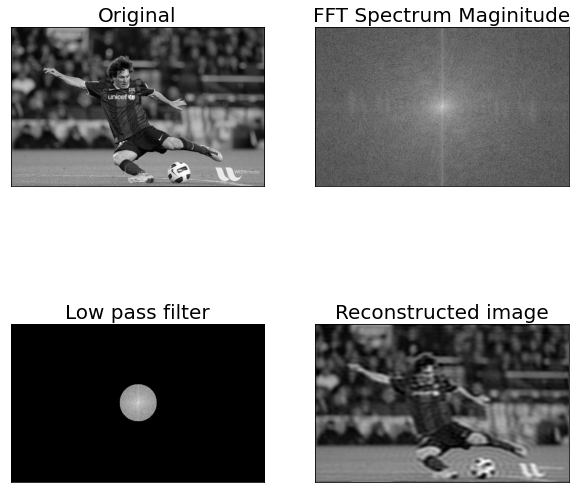

In [259]:
# low pass filter
lowpass_d = mask*_log
lowpass = mask*_shifted
lowpass_ishift = np.fft.ifftshift(lowpass)
messi_rec = reverse_fft(lowpass_ishift) 
plot_grid([green(messi),_log,lowpass_d,messi_rec],
          ["Original","FFT Spectrum Maginitude",
           "Low pass filter","Reconstructed image"])

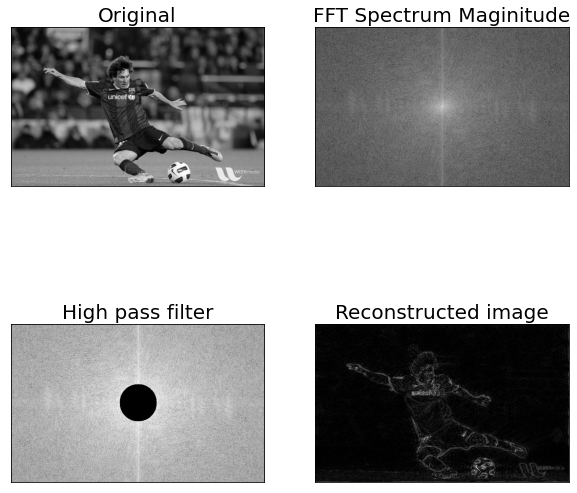

In [258]:
# high pass filter
hmask = ~mask
highpass_d = hmask*_log
highpass = hmask*_shifted
highpass_ishift = np.fft.ifftshift(highpass)
messi_rec = reverse_fft(highpass_ishift) 
plot_grid([green(messi),_log,highpass_d,messi_rec],
          ["Original","FFT Spectrum Maginitude",
           "High pass filter","Reconstructed image"])